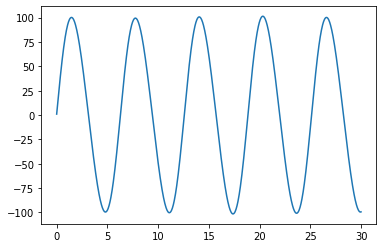

In [3]:

import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.fft import fft, ifft, rfft, fftfreq
t = []
y = []
with open("train.dat") as f:
    lines = f.readlines()
    for i in lines[1:]:
      arr = i.split()
      t.append(float(arr[0]))
      y.append(float(arr[1]))
plt.plot(t,y)
#Читаю данные, вывожу исходный график

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


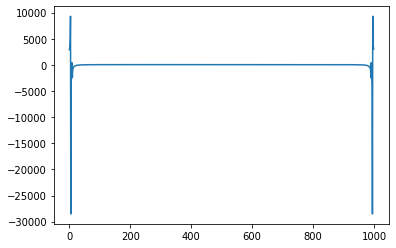

In [6]:
fftFun = fft(y)

plt.plot(fftFun)
# Преобразую данные с помощью Fast Fourier Transform

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


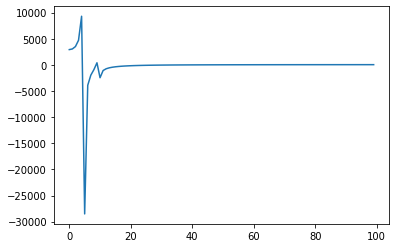

In [7]:
plt.plot(fftFun[:100])
# Получилось два пика, это значит, что наша функция состоит их двух синусоид
# Следовательно их двух составляющих, это и является ответом

/usr/local/lib/python3.8/dist-packages/scipy/signal/_peak_finding.py:261: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


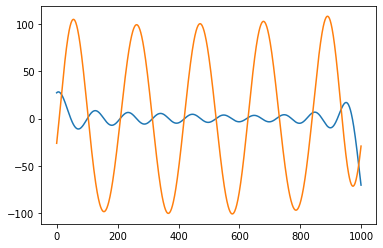

In [8]:
# Чтобы проверить, что ответ является верным, я разделяю график на две синусоиды
# Т.е fftFun1 у меня хранится одна синусоида, а в fftFun2 другая
# Затем выполняю обратное преобразование фурье

peaks, _ = find_peaks(fftFun, 5000)
fftFun1 = fftFun.copy()
fftFun2 = fftFun.copy()

fftFun1[:peaks[0]+5] = 0
fftFun1[peaks[1]-5:peaks[1]+5] = 0
fftFun1 = ifft(fftFun1).real

fftFun2[peaks[0]+5:peaks[1]-5] = 0
fftFun2 = ifft(fftFun2).real




plt.plot(fftFun1)
plt.plot(fftFun2)

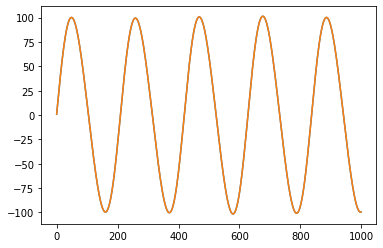

In [9]:
# Здесь я складываю разделенные синусоиды и накладываю на исходный график
# Графики полностью наложились друг на друга, следовательно ответ правильный.
plt.plot(fftFun1+fftFun2)
plt.plot(y)